In [106]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from langchain_openai import ChatOpenAI
from langchain_text_splitters import TokenTextSplitter
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [2]:
main_path = "/home/aswath/Projects/deep_learning/backup_brain/test_2/"

### Demonstration of Knowledge Graph Creation

In [3]:
input_path = main_path + "input/outsiders.txt"

In [4]:
with open(input_path, 'r') as file:
    content = file.read()

text_splitter = TokenTextSplitter(chunk_size=2000, chunk_overlap=100)
texts = text_splitter.split_text(content)

In [5]:
prompt_template = """
-Goal-
Given a text document about unconventional CEOs and their business strategies, identify all significant entities and relationships related to management philosophy, operational models, and organizational behavior. Also identify communities or clusters of similarly acting individuals or organizations if applicable.

-Steps-
1. Identify all entities. For each identified entity, extract the following information:
- entity_name: Name of the entity, capitalized
- entity_type: One of the following types: [CEO, business strategy, capital allocation approach, acquisition strategy, management style, organizational structure, performance metric, leadership trait, company, investment philosophy, decentralization approach, financial policy, operational efficiency, cultural value, peer group]
- entity_description: Comprehensive description of the entity’s attributes, behaviors, or significance
Format each entity as ("entity"{{tuple_delimiter}}<entity_name>{{tuple_delimiter}}<entity_type>{{tuple_delimiter}}<entity_description>)

2. From the entities identified in step 1, identify all pairs of (source_entity, target_entity) that are *clearly related* to each other.
For each pair of related entities, extract the following information:
- source_entity: name of the source entity, as identified in step 1
- target_entity: name of the target entity, as identified in step 1
- relationship_description: explanation as to why you think the source entity and the target entity are related to each other
- relationship_strength: an integer score between 1 to 10, indicating strength of the relationship between the source entity and target entity
Format each relationship as ("relationship"{{tuple_delimiter}}<source_entity>{{tuple_delimiter}}<target_entity>{{tuple_delimiter}}<relationship_description>{{tuple_delimiter}}<relationship_strength>)

3. Return output in English as a single list of all the entities and relationships identified in steps 1 and 2. Use **{{record_delimiter}}** as the list delimiter.

4. If you have to translate into English, just translate the descriptions, nothing else!

5. When finished, output {{completion_delimiter}}.

-Examples-
######################

entity_types: [CEO, business strategy, capital allocation approach, acquisition strategy, management style, organizational structure, performance metric, leadership trait, company, investment philosophy, decentralization approach, financial policy, operational efficiency, cultural value, peer group]
text: {input_text}
######################
output:
"""

In [6]:
llm = ChatOpenAI(temperature=0.0, model="gpt-4o", api_key= "dummy_val")

prompt = ChatPromptTemplate.from_template(prompt_template)
chain = prompt | llm | StrOutputParser()

In [7]:
response = chain.invoke({"input_text": content[:10000]})

In [8]:
print(response)

("entity" | "John Templeton" | "CEO" | "John Templeton is known for his quote about producing superior performance by doing something different, highlighting his unconventional approach to business leadership.") **{record_delimiter}** ("entity" | "Henry Singleton" | "CEO" | "Henry Singleton was a CEO known for his unconventional management style and superior market performance compared to peers like Jack Welch.") **{record_delimiter}** ("entity" | "Jack Welch" | "CEO" | "Jack Welch is a well-known CEO, often portrayed as a charismatic, action-oriented leader, and a benchmark for market performance.") **{record_delimiter}** ("entity" | "Warren Buffett" | "CEO" | "Warren Buffett is a renowned CEO who identified the 'institutional imperative' as a force that compels CEOs to imitate their peers.") **{record_delimiter}** ("entity" | "Teledyne" | "company" | "Teledyne is a company known for its exceptional market performance under unconventional leadership.") **{record_delimiter}** ("entity"

### Analysing Created Knowledge Graph

In [9]:
entities_path = main_path + "output/entities.parquet"
communities_path = main_path + "output/communities.parquet"
community_reports_path = main_path + "output/community_reports.parquet"
documents_path = main_path + "output/documents.parquet"
relationships_path = "output/relationships.parquet"

entity_df = pd.read_parquet(entities_path)
community_df = pd.read_parquet(communities_path)
community_report_df = pd.read_parquet(community_reports_path)
documents_df = pd.read_parquet(documents_path)
relationships_df = pd.read_parquet(relationships_path)

### Entity

In [16]:
entity_df.head()

,id,human_readable_id,title,type,description,text_unit_ids,frequency,degree,x,y
0,f9953914-7b91-481e-a894-edf6606cb1a2,0,STIRITZ,PERSON,Stiritz is a business executive known for his ...,[7485ee648827c0f1cadb1e8b4af1b2dd5270a897b8235...,1,11,0,0
1,d7fab43d-fd59-46e6-b719-eedf2bce399b,1,RAND ARASKOG,PERSON,"Rand Araskog was the chairman of ITT, from who...",[7485ee648827c0f1cadb1e8b4af1b2dd5270a897b8235...,1,1,0,0
2,18a7b985-3ec2-4e79-9a2a-f18bc7662328,2,PAT MULCAHY,PERSON,Pat Mulcahy is a protégé of Stiritz who later ...,[7485ee648827c0f1cadb1e8b4af1b2dd5270a897b8235...,1,1,0,0
3,eaa3b8ee-dd6f-4408-af25-a9e0f5813eab,3,RALSTON,ORGANIZATION,"Ralston is a company managed by Stiritz, where...",[7485ee648827c0f1cadb1e8b4af1b2dd5270a897b8235...,1,1,0,0
4,655f0026-f1e0-4041-93a8-fc419dd56ec2,4,ENERGIZER,ORGANIZATION,Energizer is a company that was acquired by Ra...,[7485ee648827c0f1cadb1e8b4af1b2dd5270a897b8235...,1,1,0,0


In [30]:
for i in range(entity_df.shape[0]):
    print(f"\n\nEntity : {entity_df.iloc[i]["title"]}    Type : {entity_df.iloc[i]["type"]}")
    print(f"Description : {entity_df.iloc[i]["description"]}")



Entity : STIRITZ    Type : PERSON
Description : Stiritz is a business executive known for his independent and analytical approach to management, focusing on key financial metrics and avoiding traditional accounting measures. He is recognized for his strategic acquisitions and private equity-like mindset in managing Ralston, emphasizing cash flow and shareholder value.


Entity : RAND ARASKOG    Type : PERSON
Description : Rand Araskog was the chairman of ITT, from whom Stiritz sourced the Continental Baking acquisition through direct communication.


Entity : PAT MULCAHY    Type : PERSON
Description : Pat Mulcahy is a protégé of Stiritz who later ran the business and described Stiritz's approach to acquisitions, such as the Energizer acquisition.


Entity : RALSTON    Type : ORGANIZATION
Description : Ralston is a company managed by Stiritz, where he applied a private equity-like approach, focusing on cash flow and strategic acquisitions to enhance shareholder value.


Entity : ENERG

### Relationships

In [33]:
relationships_df.head()

,id,human_readable_id,source,target,description,weight,combined_degree,text_unit_ids
0,120af309-2f80-4803-bf4a-c3242c86f709,0,STIRITZ,RALSTON,Stiritz managed Ralston with a private equity-...,9.0,12,[7485ee648827c0f1cadb1e8b4af1b2dd5270a897b8235...
1,9e7adeca-64f2-400a-afe1-c2f6fe5c083d,1,STIRITZ,RAND ARASKOG,Stiritz sourced the Continental Baking acquisi...,7.0,12,[7485ee648827c0f1cadb1e8b4af1b2dd5270a897b8235...
2,9d2cc701-2bd5-42c9-811e-02338e59c371,2,STIRITZ,PAT MULCAHY,Pat Mulcahy was a protégé of Stiritz and later...,8.0,12,[7485ee648827c0f1cadb1e8b4af1b2dd5270a897b8235...
3,abaf7ac6-c3d1-47e3-8379-3b2b22512397,3,STIRITZ,ENERGIZER,Stiritz led the acquisition of Energizer with ...,8.0,12,[7485ee648827c0f1cadb1e8b4af1b2dd5270a897b8235...
4,cfb660ce-aa04-43c4-af47-d4a7efc40d59,4,STIRITZ,NESTLÉ,Stiritz negotiated a multibillion-dollar deal ...,7.0,12,[7485ee648827c0f1cadb1e8b4af1b2dd5270a897b8235...


In [34]:
for i in range(relationships_df.shape[0]):
    print(f"\n\nSource : {relationships_df.iloc[i]["source"]}    Target : {relationships_df.iloc[i]["target"]}    Weight : {relationships_df.iloc[i]["weight"]}")
    print(f"Description : {relationships_df.iloc[i]["description"]}")



Source : STIRITZ    Target : RALSTON    Weight : 9.0
Description : Stiritz managed Ralston with a private equity-like approach, focusing on cash flow and strategic acquisitions


Source : STIRITZ    Target : RAND ARASKOG    Weight : 7.0
Description : Stiritz sourced the Continental Baking acquisition from Rand Araskog through direct communication


Source : STIRITZ    Target : PAT MULCAHY    Weight : 8.0
Description : Pat Mulcahy was a protégé of Stiritz and later ran the business, adopting his strategic approach


Source : STIRITZ    Target : ENERGIZER    Weight : 8.0
Description : Stiritz led the acquisition of Energizer with a focused and straightforward strategy


Source : STIRITZ    Target : NESTLÉ    Weight : 7.0
Description : Stiritz negotiated a multibillion-dollar deal with Nestlé, showcasing his aggressive approach with investment bankers


Source : STIRITZ    Target : RJR NABISCO    Weight : 6.0
Description : Stiritz participated in the RJR Nabisco sale process, demonstrat

### Communities

In [51]:
community_report_df.head()

,id,human_readable_id,community,level,parent,children,title,summary,full_content,rank,rating_explanation,findings,full_content_json,period,size
0,61a89e0dcd6f439c9ff1bb7e0f72abd4,10,10,3,8,[],Berkshire Hathaway and Warren Buffett's Invest...,The community is centered around Berkshire Hat...,# Berkshire Hathaway and Warren Buffett's Inve...,9.5,The impact severity rating is high due to Berk...,"[{'explanation': 'Warren Buffett, as the chair...","{\n ""title"": ""Berkshire Hathaway and Warren...",2025-05-02,10
1,29e4baf803514b2d9b4acfbddf71843f,11,11,3,8,[],MidAmerican Energy and Walter Scott,The community is centered around MidAmerican E...,# MidAmerican Energy and Walter Scott\n\nThe c...,6.5,The impact severity rating is moderately high ...,[{'explanation': 'MidAmerican Energy is a cent...,"{\n ""title"": ""MidAmerican Energy and Walter...",2025-05-02,2
2,55fb0feaed634ac8a0a61daf249ea066,8,8,2,7,"[10, 11]",Berkshire Hathaway and Key Investments,The community is centered around Berkshire Hat...,# Berkshire Hathaway and Key Investments\n\nTh...,9.5,The impact severity rating is high due to Berk...,"[{'explanation': 'Warren Buffett, as the chair...","{\n ""title"": ""Berkshire Hathaway and Key In...",2025-05-02,12
3,41ee7f7b00b842aaa83bd8e62de97432,9,9,2,7,[],Salomon Brothers and Travelers Corporation,The community is centered around Salomon Broth...,# Salomon Brothers and Travelers Corporation\n...,7.5,The impact severity rating is high due to the ...,[{'explanation': 'Salomon Brothers was an inve...,"{\n ""title"": ""Salomon Brothers and Traveler...",2025-05-02,2
4,f431a039091441e7989bb6c8ec3a6474,4,4,1,0,[],Berkshire Hathaway and Its Strategic Investments,The community is centered around Berkshire Hat...,# Berkshire Hathaway and Its Strategic Investm...,9.5,The impact severity rating is high due to Berk...,"[{'explanation': 'Berkshire Hathaway, under th...","{\n ""title"": ""Berkshire Hathaway and Its St...",2025-05-02,20


In [77]:
for i in range(community_report_df.shape[0]):
    print(f"\n\nTitle : {community_report_df.iloc[i]["title"]}   Rank : {community_report_df.iloc[i]["rank"]}")
    print(f"Rating Explanation : {community_report_df.iloc[i]["rating_explanation"]}")
    print(f"\nSummary : {community_report_df.iloc[i]["summary"]}")



Title : Berkshire Hathaway and Warren Buffett's Investment Network   Rank : 9.5
Rating Explanation : The impact severity rating is high due to Berkshire Hathaway's significant influence in the global financial markets and its strategic investments across various industries.

Summary : The community is centered around Berkshire Hathaway, a multinational conglomerate led by Warren Buffett, with significant contributions from Charlie Munger. Key entities include major acquisitions such as GEICO, General Re, and Burlington Northern Santa Fe, which highlight Buffett's strategic investment approach. The relationships within this network demonstrate a focus on insurance, transportation, and strategic partnerships, reflecting a diversified investment strategy that has been pivotal in Berkshire Hathaway's growth and influence.


Title : MidAmerican Energy and Walter Scott   Rank : 6.5
Rating Explanation : The impact severity rating is moderately high due to the involvement of high-profile ind

### Community

In [84]:
community_report_df.iloc[0]

id                                     61a89e0dcd6f439c9ff1bb7e0f72abd4
human_readable_id                                                    10
community                                                            10
level                                                                 3
parent                                                                8
children                                                             []
title                 Berkshire Hathaway and Warren Buffett's Invest...
summary               The community is centered around Berkshire Hat...
full_content          # Berkshire Hathaway and Warren Buffett's Inve...
rank                                                                9.5
rating_explanation    The impact severity rating is high due to Berk...
findings              [{'explanation': 'Warren Buffett, as the chair...
full_content_json     {\n    "title": "Berkshire Hathaway and Warren...
period                                                       202

In [89]:
print(f"Title : {community_report_df.iloc[0]["title"]}")
print(f"\nSummary : {community_report_df.iloc[0]["summary"]}")

Title : Berkshire Hathaway and Warren Buffett's Investment Network

Summary : The community is centered around Berkshire Hathaway, a multinational conglomerate led by Warren Buffett, with significant contributions from Charlie Munger. Key entities include major acquisitions such as GEICO, General Re, and Burlington Northern Santa Fe, which highlight Buffett's strategic investment approach. The relationships within this network demonstrate a focus on insurance, transportation, and strategic partnerships, reflecting a diversified investment strategy that has been pivotal in Berkshire Hathaway's growth and influence.


In [90]:
print(community_report_df.iloc[0]["full_content"])

# Berkshire Hathaway and Warren Buffett's Investment Network

The community is centered around Berkshire Hathaway, a multinational conglomerate led by Warren Buffett, with significant contributions from Charlie Munger. Key entities include major acquisitions such as GEICO, General Re, and Burlington Northern Santa Fe, which highlight Buffett's strategic investment approach. The relationships within this network demonstrate a focus on insurance, transportation, and strategic partnerships, reflecting a diversified investment strategy that has been pivotal in Berkshire Hathaway's growth and influence.

## Warren Buffett's Strategic Leadership

Warren Buffett, as the chairman and CEO of Berkshire Hathaway, is a central figure in this community. His leadership and investment strategies have been instrumental in shaping the company's direction and success. Buffett's ability to identify and capitalize on investment opportunities, particularly during financial crises, has earned him the nickna

#### Summary under consideration
Diversification through Transportation: Burlington Northern Santa Fe

The acquisition of Burlington Northern Santa Fe in 2010 represents Berkshire Hathaway's strategic diversification into the transportation sector. As the largest railroad in the United States, this acquisition has strengthened the conglomerate's presence in the transportation industry and provided a stable revenue stream [Data: Entities (57); Relationships (55)]. This move aligns with Buffett's strategy of investing in essential infrastructure that supports economic growth.

In [98]:
idx = 57
print(f"Entity : {entity_df.iloc[idx]["title"]}    Type : {entity_df.iloc[idx]["type"]}")
print(f"Description : {entity_df.iloc[idx]["description"]}")

Entity : BURLINGTON NORTHERN SANTA FE    Type : ORGANIZATION
Description : Burlington Northern Santa Fe is the largest railroad in the United States, acquired by Berkshire Hathaway in 2010


In [99]:
idx = 55
print(f"Source : {relationships_df.iloc[idx]["source"]}    Target : {relationships_df.iloc[idx]["target"]}    Weight : {relationships_df.iloc[idx]["weight"]}")
print(f"Description : {relationships_df.iloc[idx]["description"]}")

Source : WARREN BUFFETT    Target : BURLINGTON NORTHERN SANTA FE    Weight : 9.0
Description : Warren Buffett acquired Burlington Northern Santa Fe in 2010


#### Summary under consideration

Significant Acquisitions: GEICO and General Re

GEICO and General Re are two significant acquisitions by Berkshire Hathaway that highlight its strategic focus on the insurance sector. GEICO, acquired in 1996, has become a major contributor to the conglomerate's portfolio, reflecting its importance and value [Data: Entities (35); Relationships (48)]. General Re, acquired in 1998 for $22 billion, marked the largest transaction in Berkshire Hathaway's history, underscoring the company's commitment to expanding its insurance operations [Data: Entities (45); Relationships (49)].

In [102]:
idx = 45
print(f"Entity : {entity_df.iloc[idx]["title"]}    Type : {entity_df.iloc[idx]["type"]}")
print(f"Description : {entity_df.iloc[idx]["description"]}")

Entity : GENERAL RE    Type : ORGANIZATION
Description : General Re is a prominent reinsurer that was acquired by Berkshire Hathaway in 1998. This acquisition was a significant milestone, as it marked the largest transaction in Berkshire Hathaway's history, with a deal valued at $22 billion.


In [103]:
idx = 49
print(f"Source : {relationships_df.iloc[idx]["source"]}    Target : {relationships_df.iloc[idx]["target"]}    Weight : {relationships_df.iloc[idx]["weight"]}")
print(f"Description : {relationships_df.iloc[idx]["description"]}")

Source : WARREN BUFFETT    Target : GENERAL RE    Weight : 8.0
Description : Warren Buffett acquired General Re in 1998 for $22 billion


### Visualize Graph

In [108]:
G = nx.DiGraph()

In [112]:
for _, row in entity_df.iterrows():
    G.add_node(row['title'], type=row['type'], description=row['description'])

In [114]:
for _, row in relationships_df.iterrows():
    G.add_edge(row['source'], row['target'], description=row['description'], strength=row['weight'])

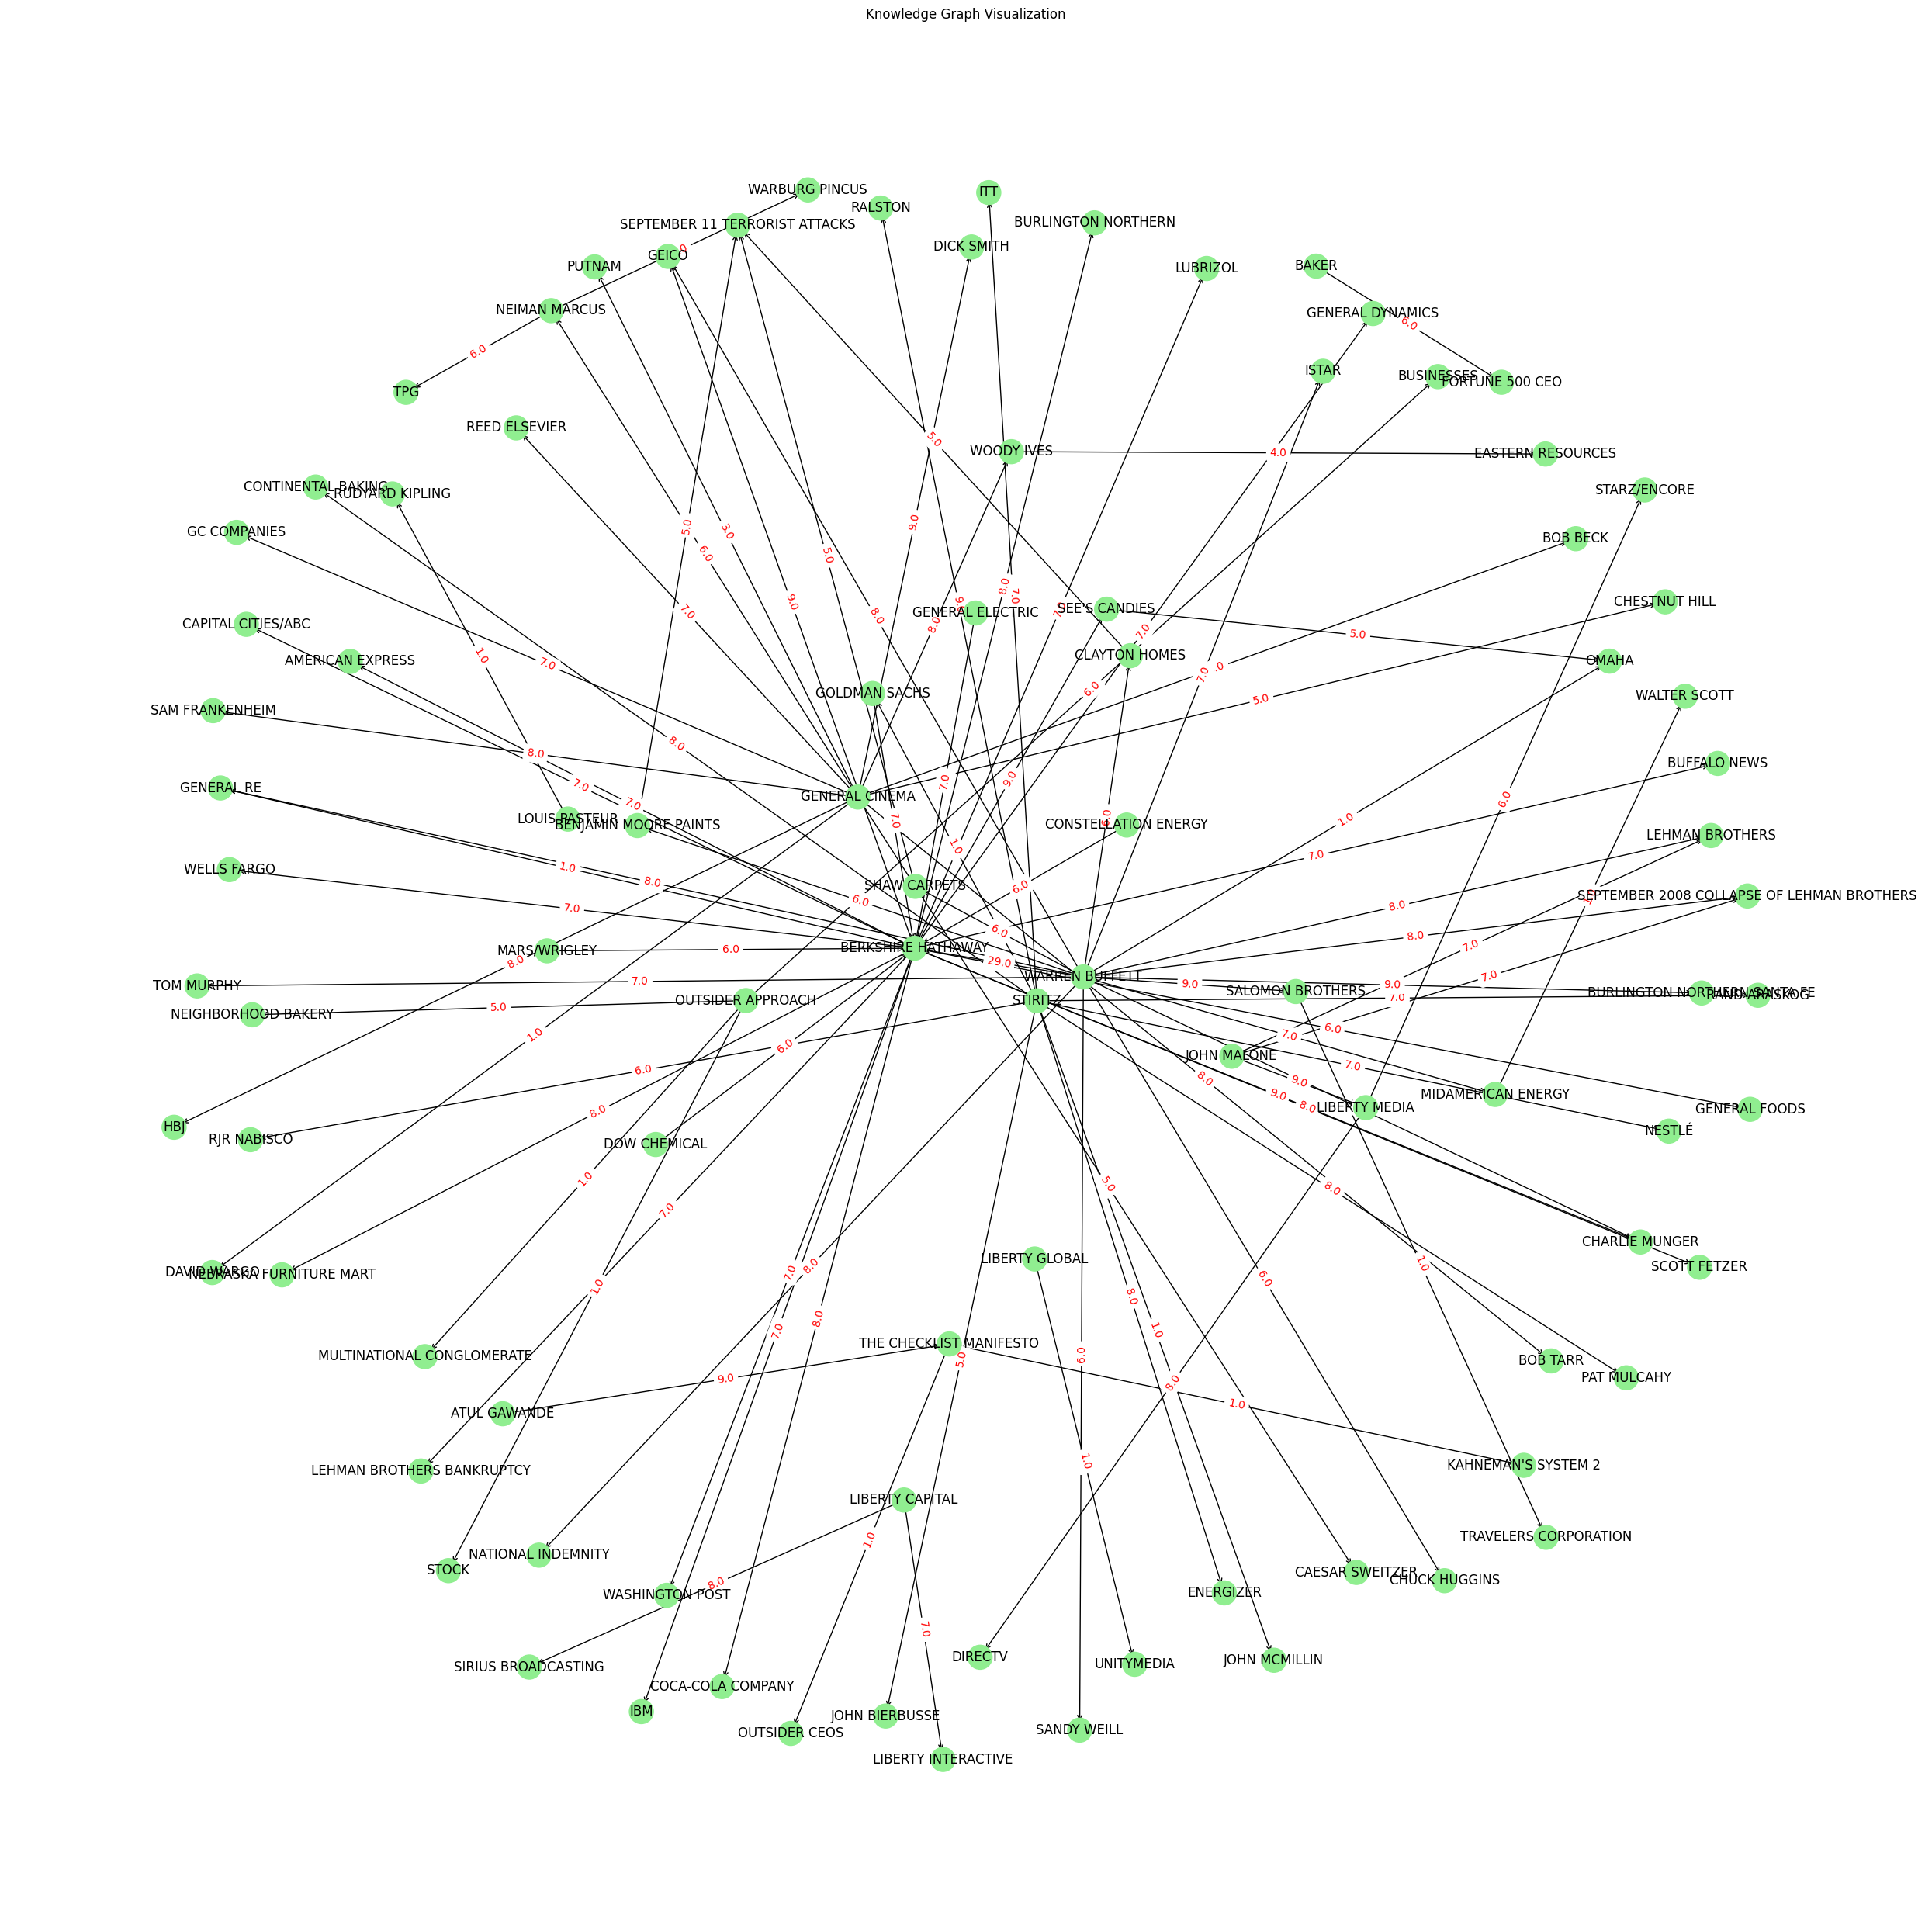

In [120]:
plt.figure(figsize=(25, 25))
pos = nx.spring_layout(G, k=0.5)

node_colors = ['lightblue' if G.nodes[n]['type'] == 'user' else 'lightgreen' for n in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors)

nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=10)

nx.draw_networkx_labels(G, pos, font_size=12)

edge_labels = {(u, v): d['strength'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Knowledge Graph Visualization")
plt.axis('off')
plt.tight_layout()
plt.show()